In [1]:
pip install ucimlrepo



Árvore de Decisão:
Acurácia: 0.8644
Precisão: 0.9091
Revocação: 0.9091
F1-Score: 0.9091

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.91      0.91      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.86      0.86      0.86        59



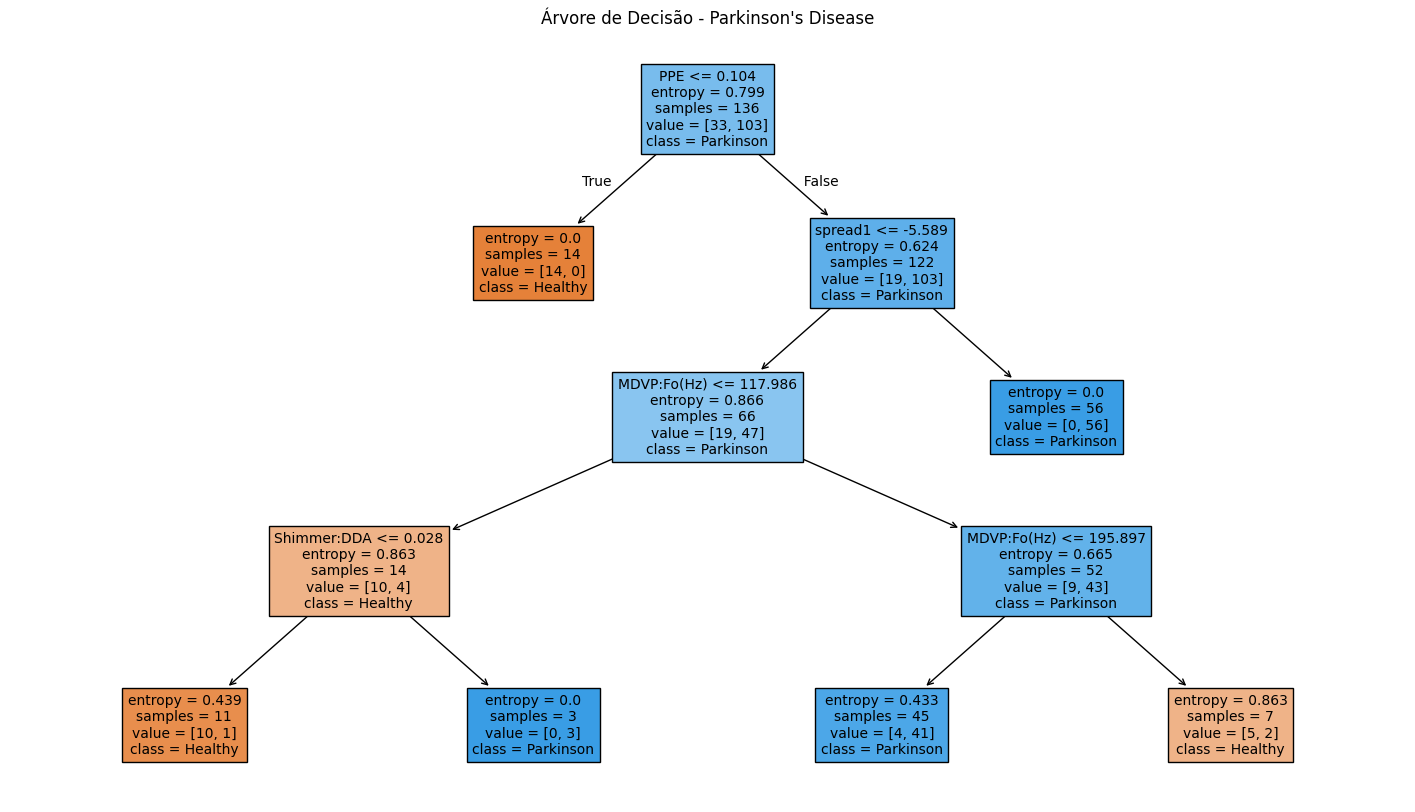


Naive Bayes:
Acurácia: 0.7458
Precisão: 0.9143
Revocação: 0.7273
F1-Score: 0.8101

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      0.80      0.62        15
           1       0.91      0.73      0.81        44

    accuracy                           0.75        59
   macro avg       0.71      0.76      0.71        59
weighted avg       0.81      0.75      0.76        59


K-Nearest Neighbors (K=5):
Acurácia: 0.8983
Precisão: 0.8958
Revocação: 0.9773
F1-Score: 0.9348

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59



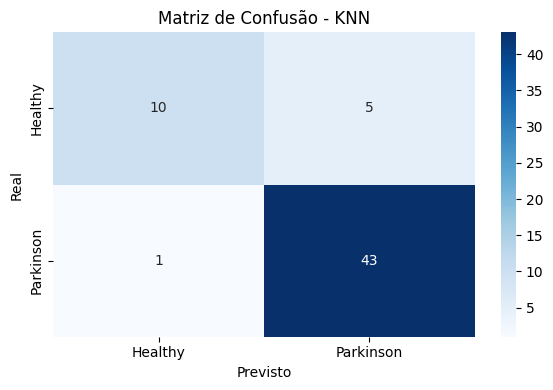

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Baixar e ler o CSV direto da URL do UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)

# Separar features e target
X = df.drop(columns=['name', 'status'])  # 'status' é a coluna alvo (0=healthy, 1=parkinson)
y = df['status']

# Tratar valores ausentes (não tem nesse dataset, mas só por segurança)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def print_metrics(y_true, y_pred):
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"Revocação: {recall_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, zero_division=0):.4f}")

# Árvore de Decisão
modelo_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
modelo_tree.fit(X_train, y_train)
y_pred_tree = modelo_tree.predict(X_test)

print("\nÁrvore de Decisão:")
print_metrics(y_test, y_pred_tree)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_tree, zero_division=0))

plt.figure(figsize=(18, 10))
plot_tree(modelo_tree, feature_names=X.columns, class_names=['Healthy', 'Parkinson'], filled=True, fontsize=10)
plt.title("Árvore de Decisão - Parkinson's Disease")
plt.show()

# Naive Bayes
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)
y_pred_nb = modelo_nb.predict(X_test)

print("\nNaive Bayes:")
print_metrics(y_test, y_pred_nb)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_nb, zero_division=0))

# KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_scaled, y_train)
y_pred_knn = modelo_knn.predict(X_test_scaled)

print("\nK-Nearest Neighbors (K=5):")
print_metrics(y_test, y_pred_knn)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_knn, zero_division=0))

# Matriz de Confusão para KNN
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Parkinson'], yticklabels=['Healthy', 'Parkinson'])
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()
